In [27]:
#Exploratory Data Analysis and Preprocessing 
#Cancer Classification dataset 
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 

In [28]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [29]:
df.info()
# to find any null values - 569 non-null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [30]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<Axes: xlabel='benign_0__mal_1', ylabel='count'>

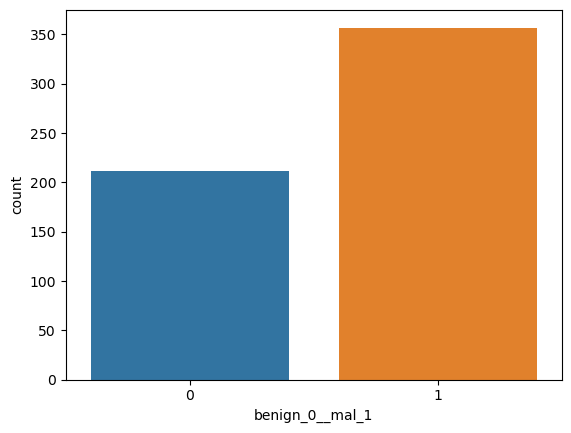

In [31]:
# for class tasks useful to do countplot and see whether we have a well balanced problem or not 
sns.countplot(x='benign_0__mal_1', data=df)
# we have more cases of malignanat than benign but the differenceis not too big 


In [32]:
# now to observe the correlation in the data 
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


<Axes: >

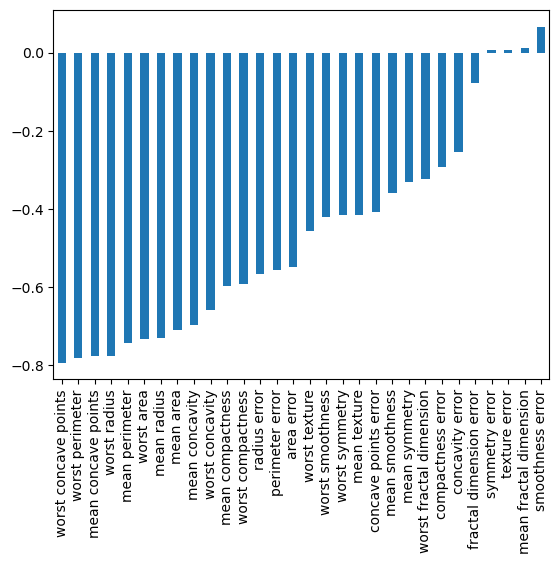

In [33]:
# to see the correlation with regards to whether it is malignant or benign
# the [:-1] -keeps everything but the last label column as it has. corr of 1 
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind = 'bar')


<Axes: >

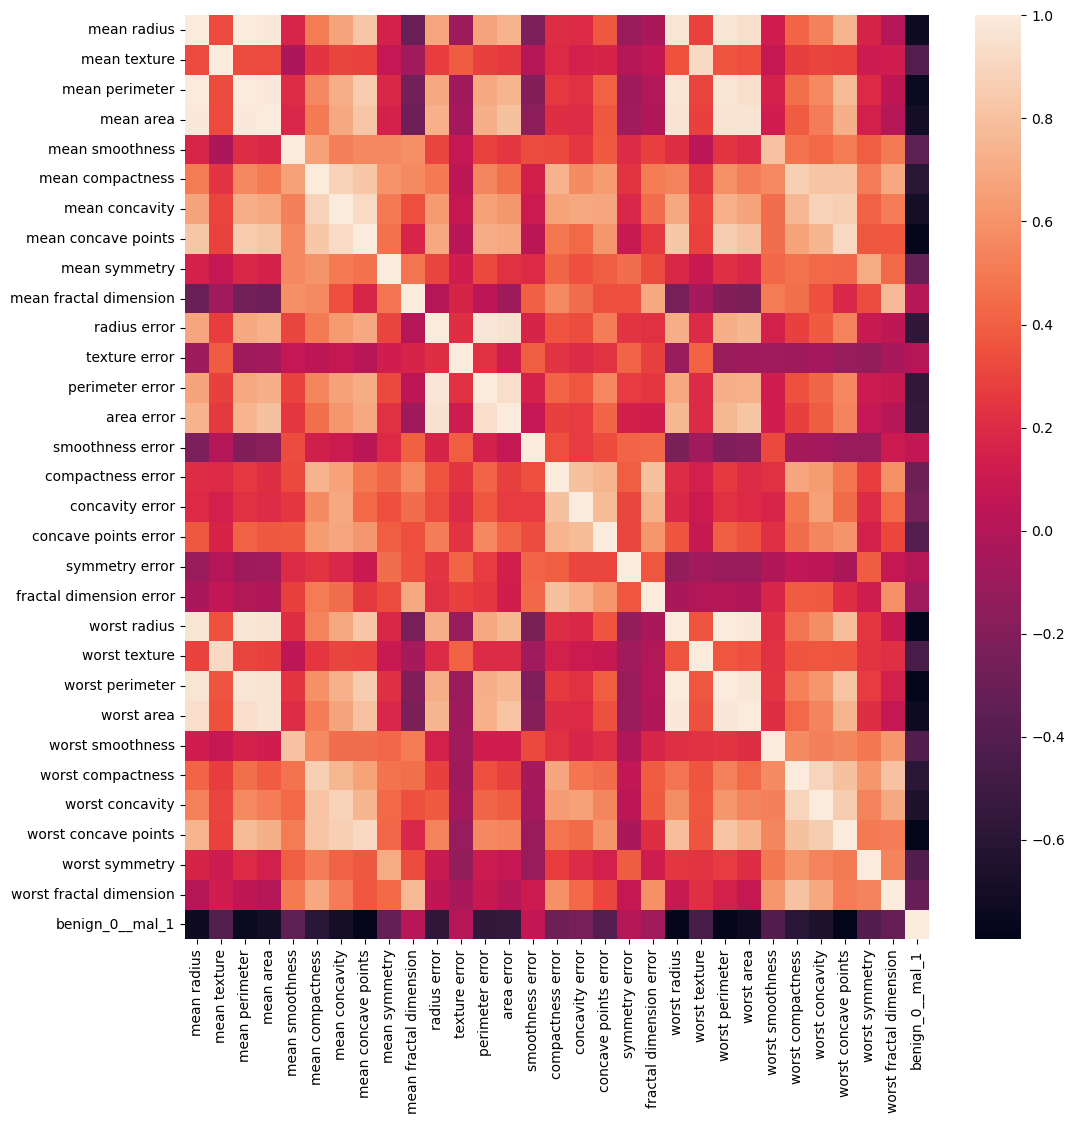

In [34]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

In [35]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)


In [38]:
# now to scale data 
from sklearn.preprocessing import MinMaxScaler

In [39]:
# create instance of scaler 
scaler = MinMaxScaler()

In [40]:
X_train = scaler.fit_transform(X_train)

In [41]:
X_test = scaler.fit_transform(X_test)

In [42]:
from tensorflow.keras.models import Sequential 

In [44]:
from tensorflow.keras.layers import Dense, Dropout  

In [45]:
X_train.shape 

(426, 30)

In [46]:
model = Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15, activation = 'relu'))

# since we have BINARY CLASSIFICATION ACTIVATION FN.- SIGMOID
# 1 neuron output 0 and 1 - malignant or benign
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer='adam')


In [47]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data= (X_test,y_test))



Epoch 1/600
14/14 [==============================] - 1s 8ms/step - loss: 0.7078 - val_loss: 0.6864
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6672 - val_loss: 0.6445
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6310 - val_loss: 0.6086
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5962 - val_loss: 0.5682
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5622 - val_loss: 0.5283
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5277 - val_loss: 0.4917
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4940 - val_loss: 0.4542
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4598 - val_loss: 0.4164
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4249 - val_loss: 0.3838
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3925 - val_loss: 0.3503
Epoch 11/

Epoch 83/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0562 - val_loss: 0.1741
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0561 - val_loss: 0.1758
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0553 - val_loss: 0.1832
Epoch 86/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0553 - val_loss: 0.1931
Epoch 87/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0553 - val_loss: 0.1812
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0546 - val_loss: 0.1824
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0616 - val_loss: 0.2037
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0602 - val_loss: 0.1881
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0560 - val_loss: 0.1712
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0534 - val_loss: 0.1944


14/14 [==============================] - 0s 2ms/step - loss: 0.0474 - val_loss: 0.2882
Epoch 165/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0444 - val_loss: 0.2608
Epoch 166/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0443 - val_loss: 0.3003
Epoch 167/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0455 - val_loss: 0.2644
Epoch 168/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0451 - val_loss: 0.2849
Epoch 169/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0456 - val_loss: 0.2924
Epoch 170/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0440 - val_loss: 0.3163
Epoch 171/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0439 - val_loss: 0.2873
Epoch 172/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0459 - val_loss: 0.2791
Epoch 173/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0472 - val_loss: 0.3214
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0381 - val_loss: 0.3915
Epoch 246/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0392 - val_loss: 0.4538
Epoch 247/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0378 - val_loss: 0.3688
Epoch 248/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0393 - val_loss: 0.4363
Epoch 249/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0382 - val_loss: 0.3915
Epoch 250/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0385 - val_loss: 0.4623
Epoch 251/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0397 - val_loss: 0.4254
Epoch 252/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0390 - val_loss: 0.4371
Epoch 253/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0377 - val_loss: 0.4162
Epoch 254/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0384 - val_loss: 0.4597
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0390 - val_loss: 0.5583
Epoch 327/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0369 - val_loss: 0.5204
Epoch 328/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0365 - val_loss: 0.5562
Epoch 329/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0337 - val_loss: 0.5635
Epoch 330/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0353 - val_loss: 0.5325
Epoch 331/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0346 - val_loss: 0.5097
Epoch 332/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0345 - val_loss: 0.6029
Epoch 333/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0393 - val_loss: 0.5193
Epoch 334/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0349 - val_loss: 0.5802
Epoch 335/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0332 - val_loss: 0.5422
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0314 - val_loss: 0.5904
Epoch 408/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0317 - val_loss: 0.7220
Epoch 409/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0302 - val_loss: 0.6424
Epoch 410/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0285 - val_loss: 0.7211
Epoch 411/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0319 - val_loss: 0.6141
Epoch 412/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0375 - val_loss: 0.6883
Epoch 413/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0311 - val_loss: 0.7198
Epoch 414/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0286 - val_loss: 0.6133
Epoch 415/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0289 - val_loss: 0.7755
Epoch 416/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0287 - val_loss: 0.6763
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0249 - val_loss: 0.8134
Epoch 489/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0236 - val_loss: 0.8245
Epoch 490/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0229 - val_loss: 0.8860
Epoch 491/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0245 - val_loss: 0.8304
Epoch 492/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0241 - val_loss: 0.7571
Epoch 493/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0258 - val_loss: 0.8437
Epoch 494/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0237 - val_loss: 0.8187
Epoch 495/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0231 - val_loss: 0.8238
Epoch 496/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0250 - val_loss: 0.7498
Epoch 497/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0247 - val_loss: 0.8365
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0180 - val_loss: 0.9667
Epoch 570/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0184 - val_loss: 0.9490
Epoch 571/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0188 - val_loss: 0.9762
Epoch 572/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0176 - val_loss: 0.9011
Epoch 573/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0181 - val_loss: 0.9811
Epoch 574/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0198 - val_loss: 0.9836
Epoch 575/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0185 - val_loss: 0.9764
Epoch 576/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0189 - val_loss: 0.9799
Epoch 577/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0188 - val_loss: 0.9494
Epoch 578/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0177 - val_loss: 0.9800
Epoc

In [49]:
# now to plot the training loss and the valiation loss 
losses = pd.DataFrame(model.history.history)

<Axes: >

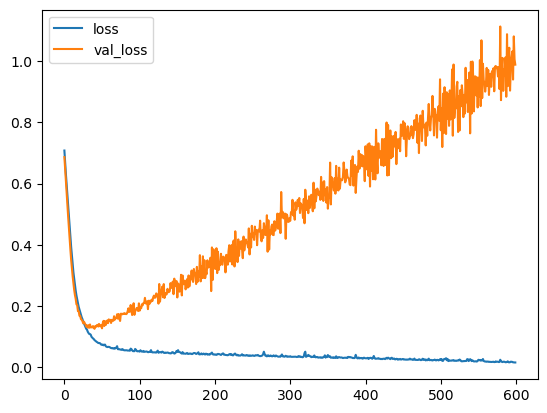

In [50]:
losses.plot()
# from the plot there is evidence of severe case of overfitting the data 
# from 0 -50 epochs the loss decreases but after 50 the val loss increases while traing decreases , this shows that we are overfitting the data 
# now we will use callbacks for ealy stopping to avoid overfitting of the data 

In [51]:
# we redefine the model again to avoid training the old model again 
model = Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15, activation = 'relu'))

# since we have BINARY CLASSIFICATION ACTIVATION FN.- SIGMOID
# 1 neuron output 0 and 1 - malignant or benign
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer='adam')


In [52]:
from tensorflow.keras.callbacks import EarlyStopping 

In [53]:
# use help() , to understand what a library actually does 
help(EarlyStopping)

Help on class EarlyStopping in module keras.src.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False, start_from_epoch=0)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quanti

In [55]:
# earlystopping - be aware of the mode - if accuracy we want max , if loss we want min mode 
# since we want to have early stopping to avoid val loss increasing we monitor val loss to track when it reaches its minimum value 

early_stop = EarlyStopping(monitor='val_loss',mode='min', verbose=1,patience=25)



In [56]:
#now fit the redefined model again 
model.fit(x=X_train, y=y_train, epochs=600, validation_data= (X_test,y_test),
         callbacks=[early_stop])

# callbacks=[early_stop] - this is added to stop the model when min val loss is reached 


Epoch 1/600
14/14 [==============================] - 1s 8ms/step - loss: 0.6876 - val_loss: 0.6702
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6601 - val_loss: 0.6411
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6313 - val_loss: 0.6018
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5905 - val_loss: 0.5479
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5330 - val_loss: 0.4850
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4705 - val_loss: 0.4228
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4088 - val_loss: 0.3587
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3517 - val_loss: 0.3031
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3040 - val_loss: 0.2651
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2677 - val_loss: 0.2325
Epoch 11/

<Axes: >

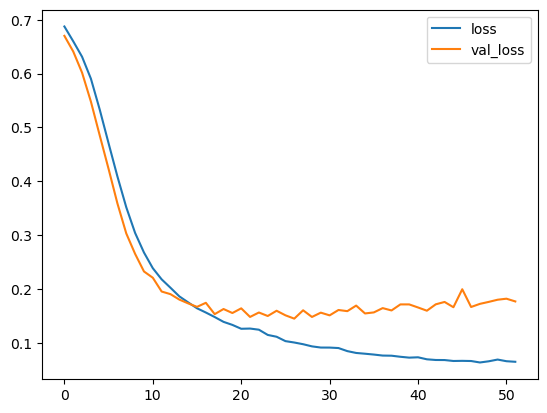

In [57]:
# now to plot the history of this model 
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()
# now the plot is improved , there is a flattening out of the val looss 

In [ ]:
# 2nd method to stop overfitting with dropout layers 
   
    

In [58]:
from tensorflow.keras.layers import Dropout 

In [61]:
# we redefine the model again to avoid training the old model again 
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation = 'relu'))
# 0.5 - half neurons are going to be turned off randomly - rate: Float between 0 and 1. Fraction of the input units to drop.
model.add(Dropout(0.5))

# since we have BINARY CLASSIFICATION ACTIVATION FN.- SIGMOID
# 1 neuron output 0 and 1 - malignant or benign
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer='adam')

In [62]:
#now fit the redefined model again 
model.fit(x=X_train, y=y_train, epochs=600, validation_data= (X_test,y_test),
         callbacks=[early_stop])

# we can see that this model runs for more epochs 


Epoch 1/600
14/14 [==============================] - 1s 7ms/step - loss: 0.7188 - val_loss: 0.6951
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6825 - val_loss: 0.6720
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6787 - val_loss: 0.6540
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6616 - val_loss: 0.6309
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6505 - val_loss: 0.6099
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6134 - val_loss: 0.5803
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5808 - val_loss: 0.5495
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5774 - val_loss: 0.5224
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5552 - val_loss: 0.4961
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5413 - val_loss: 0.4715
Epoch 11/

In [63]:
model_losse = pd.DataFrame(model.history.history)

<Axes: >

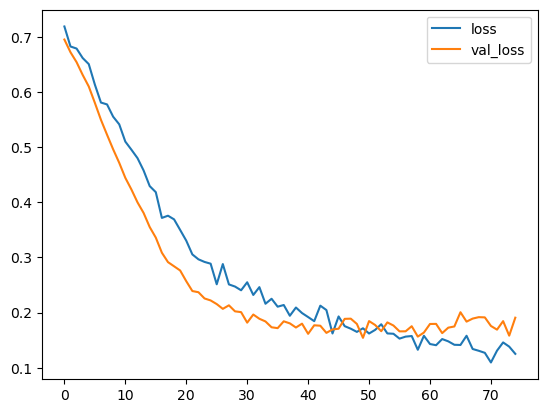

In [64]:
model_losse.plot()

In [71]:
# this shows that adding early stopping and dropout layers significantly imrpoves the performance of a model 
# to do a full evaluation of the classes 

#model.predict_class(X_test) - old incorrect syntax

In [72]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

5/5 [==============================] - 0s 1ms/step


In [73]:
predictions 


array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [74]:
# now to plot the classification report and confusion matrix 
from sklearn.metrics import classification_report, confusion_matrix


In [76]:
print(classification_report(y_test, predictions))
# our classification report shows very high accuracy results 

              precision    recall  f1-score   support

           0       0.83      0.98      0.90        55
           1       0.99      0.88      0.93        88

    accuracy                           0.92       143
   macro avg       0.91      0.93      0.91       143
weighted avg       0.93      0.92      0.92       143



In [78]:
# leading diagonal with majority predictions being correct in the confusion matrix is another indcation of a well perfroming model 
print(confusion_matrix(y_test,predictions))


[[54  1]
 [11 77]]
